# Mean Squared Displacement Analysis

The `simulators` module from `iscat-lib` can be used to simulate hopping diffusion:

Simulation: 100%|████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 134292.93it/s]


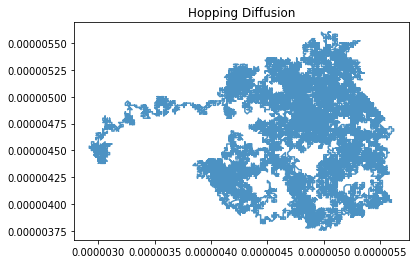

{'Df': 8e-13,
 'HL': 1e-06,
 'HP': 0.01,
 'L': 1e-05,
 'Tmax': 2.5,
 'dL': 2e-08,
 'dt': 5e-05,
 'quantize': True,
 'seed': 42}


In [1]:
from iscat_lib import simulators

s = simulators.HoppingDiffusion(Tmax=2.5, dt=0.5e-4, HL=1e-6, seed=42)
s.run()
s.display_trajectory()
s.print_parameters()

The `Track`class can then be used to analyse the resulting trajectory.

In [2]:
from iscat_lib.analysis import Track

We create a new `Track` from the simulated trajectory.

In [3]:
track = Track.from_dict(s.trajectory)
track

<Track instance at 1223040787400>
------------------------
Track length:      50000
Track ID:           None
------------------------
MSD calculated:    False
MSD analysis done: False
SD analysis done:  False
ADC analysis done: False

A `Track` instance contains not only information about the trajectory but can also hold the MSD data and analysis results.

We demonstrate the analysis using `sd_analysis`. 

In [4]:
track.sd_analysis(maxfev=10000)

SD analysis for single track: 100%|███████████████████████████████████████████████████| 23/23 [00:00<00:00, 278.55it/s]


{'analyzed': True,
 'model': 'brownian',
 'Dapp': array([3.01642024e-12, 1.91500963e-12, 1.46227526e-12, 1.17459978e-12,
        1.20665170e-12, 1.11013515e-12, 7.77450271e-13, 1.00169532e-12,
        8.88695274e-13, 8.56762955e-13, 7.81359254e-13, 8.42912262e-13,
        8.41427696e-13, 8.43006367e-13, 8.11776552e-13, 7.97155661e-13,
        7.95857603e-13, 8.06512831e-13, 8.08971360e-13, 7.96377478e-13,
        7.85209871e-13, 7.86418084e-13, 7.75739694e-13]),
 'J': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  15,  20,  25,
         30,  35,  40,  45,  50,  60,  70,  80,  90, 100]),
 'results': {'brownian': {'params': array([7.62615639e-13, 1.05353839e-08]),
   'errors': array([9.31758728e-14, 5.41520865e-10]),
   'bic': -55.51239223120009,
   'rel_likelihood': 1.0},
  'confined': {'params': array([7.62615639e-13, 1.05353839e-08, 1.00000000e-03]),
   'errors': array([5.38084081e-12, 7.49914234e-08, 5.69918654e-03]),
   'bic': -49.66664690178004,
   'rel_likelihood': 0.05

`sd_analysis` returns the analysis results but also saves them within in the `Track` instance.

In [5]:
track

<Track instance at 1223040787400>
------------------------
Track length:      50000
Track ID:           None
------------------------
MSD calculated:    False
MSD analysis done: False
SD analysis done:   True
ADC analysis done: False

We can plot the results using `plot_sd_analysis_results`.

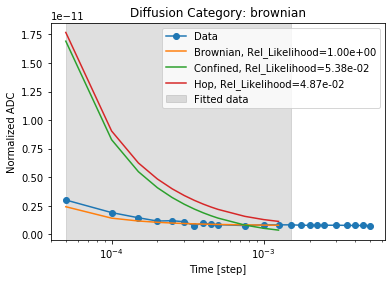

In [6]:
track.plot_sd_analysis_results()